In [2]:
!sudo apt-get update -y && sudo apt-get install python3.12 python3-pip -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.12 1
!python3 -m pip install --upgrade pip

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,683 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,804 kB]
Get:13 http://security.ubuntu.com/ubuntu jam

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
!git clone https://github.com/nickmccullum/cats-and-dogs.git

Cloning into 'cats-and-dogs'...
remote: Enumerating objects: 10016, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 10016 (delta 0), reused 0 (delta 0), pack-reused 10014 (from 1)
Receiving objects: 100% (10016/10016), 216.39 MiB | 34.83 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (10008/10008), done.


In [5]:
training_generator = ImageDataGenerator(

                        rescale = 1/255,

                        shear_range = 0.2,

                        zoom_range = 0.2,

                        horizontal_flip = True)

In [6]:
training_set = training_generator.flow_from_directory('/content/cats-and-dogs/training_data',

            target_size = (64, 64), # target_size variable contains the dimensions that each image in the data set will be resized

            # each epoch of training, the dataset is divided into smaller subsets called batches and set the it before performing the augmentation,
            # and the selected batch size is determines how many training examples are processed at once during each iteration
            batch_size = 32,

            class_mode = 'binary')

Found 8000 images belonging to 2 classes.


## 1: Print the output of training_generator.flow_from_directory as an image

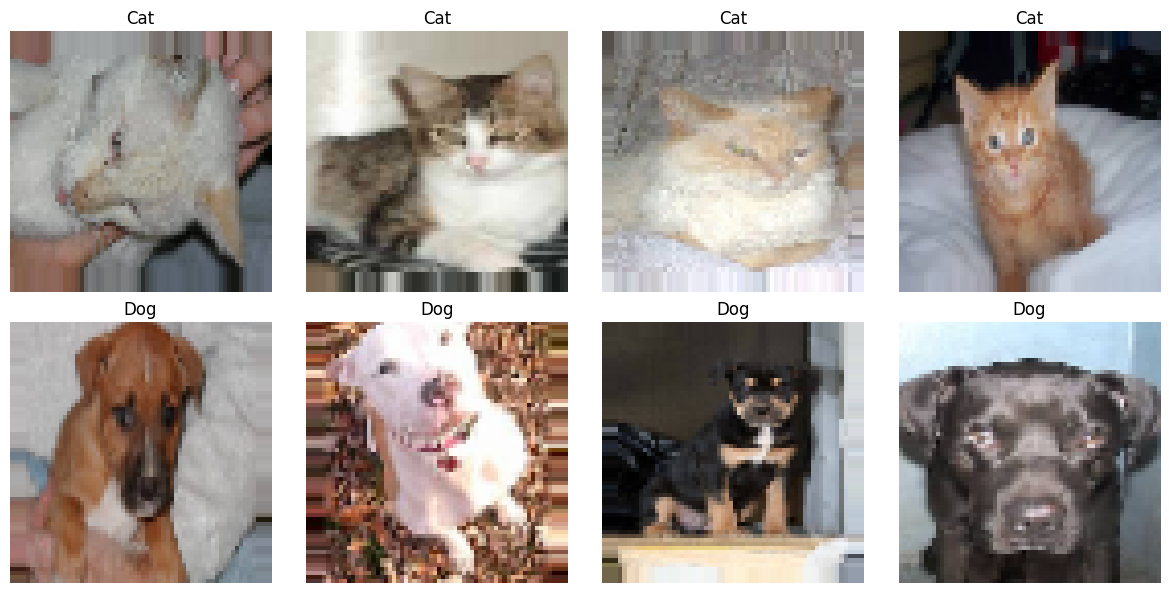

In [7]:
# Get a batch of images and labels
images, labels = next(training_set)

# Initialize counters for each class
cat_count = 1
dog_count = 1

# Create a grid for 4 images of each class (total 8 images)
plt.figure(figsize=(12, 6))

# Loop through the images and display them
for i in range(len(images)):
    if labels[i] == 0 and cat_count < 5:  # If the label is 0 (Cat)
        plt.subplot(2, 4, cat_count)  # Position for cats
        plt.imshow(images[i])
        plt.title('Cat')
        plt.axis('off')
        cat_count += 1
    elif labels[i] == 1 and dog_count < 5:  # If the label is 1 (Dog)
        plt.subplot(2, 4, 4 + dog_count)  # Position for dogs
        plt.imshow(images[i])
        plt.title('Dog')
        plt.axis('off')
        dog_count += 1

    # Stop if we have 4 images of both classes
    if cat_count >=5  and dog_count >=5:
        break

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [8]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_set = test_generator.flow_from_directory('/content/cats-and-dogs/test_data',

                                            target_size = (64, 64),

                                            batch_size = 32,

                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.


## 2: Print the output of test_generator.flow_from_directory as an imag

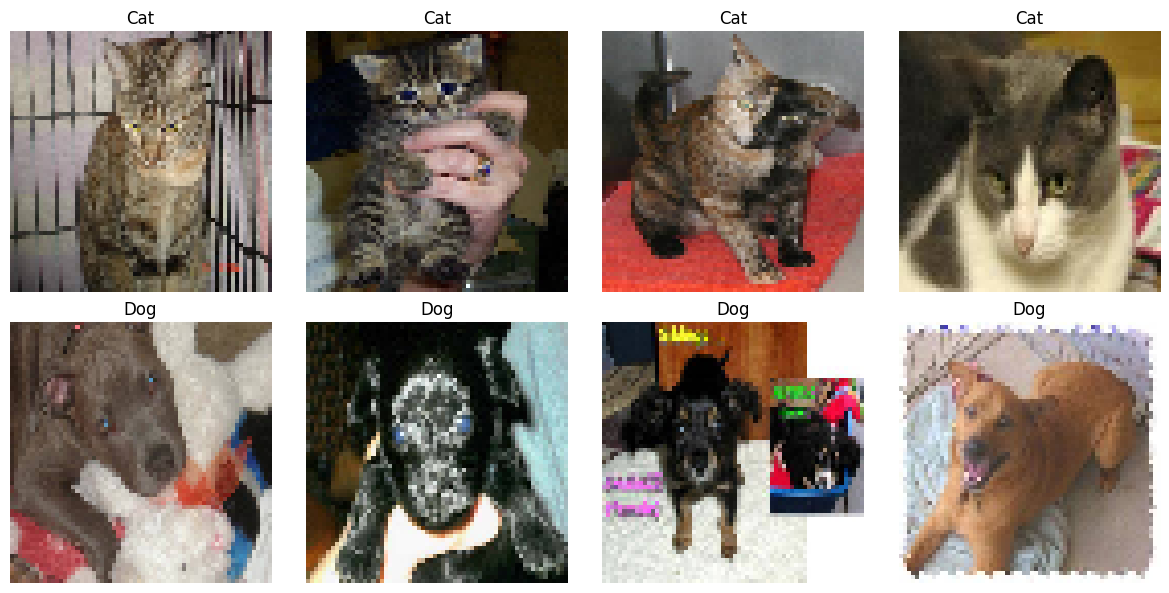

In [9]:
# Get a batch of images and labels
images, labels = next(test_set)

# Initialize counters for each class
cat_count = 1
dog_count = 1

# Create a grid for 4 images of each class (total 8 images)
plt.figure(figsize=(12, 6))

# Loop through the images and display them
for i in range(len(images)):
    if labels[i] == 0 and cat_count < 5:  # If the label is 0 (Cat)
        plt.subplot(2, 4, cat_count)  # Position for cats
        plt.imshow(images[i])
        plt.title('Cat')
        plt.axis('off')
        cat_count += 1
    elif labels[i] == 1 and dog_count < 5:  # If the label is 1 (Dog)
        plt.subplot(2, 4, 4 + dog_count)  # Position for dogs
        plt.imshow(images[i])
        plt.title('Dog')
        plt.axis('off')
        dog_count += 1

    # Stop if we have 4 images of both classes
    if cat_count >=5  and dog_count >=5:
        break

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

##Building Our Convolutional Neural Network

**3: Add command if we wanted to have 64 feature detectors, with a kernel size of 5x5**

In [10]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation= 'relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model and fit the data

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 320ms/step - accuracy: 0.5221 - loss: 0.6965 - val_accuracy: 0.5945 - val_loss: 0.6874
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 78s 313ms/step - accuracy: 0.5717 - loss: 0.6849 - val_accuracy: 0.6170 - val_loss: 0.6601
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 332ms/step - accuracy: 0.5946 - loss: 0.6593 - val_accuracy: 0.6720 - val_loss: 0.6122
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 319ms/step - accuracy: 0.6728 - loss: 0.6096 - val_accuracy: 0.6355 - val_loss: 0.6259
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 323ms/step - accuracy: 0.6882 - loss: 0.5879 - val_accuracy: 0.7070 - val_loss: 0.5650
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 345ms/step - accuracy: 0.7165 - loss: 0.5563 - val_accuracy: 0.7295 - val_loss: 0.5372
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 320ms/step - accuracy: 0.7309 - loss: 0.5321 - val_accuracy: 0.7455 - val_loss: 0.5240
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 326ms/step - accuracy: 0.7485 - loss: 0

In [12]:
from tensorflow.keras.preprocessing import image

In [13]:
test_image_1 = image.load_img('/content/cats-and-dogs/predictions/cat_or_dog_1.jpg', target_size = (64, 64))
test_image_2 = image.load_img('/content/cats-and-dogs/predictions/cat_or_dog_2.jpg', target_size = (64, 64))

In [14]:
test_image_1 = image.img_to_array(test_image_1)
test_image_2 = image.img_to_array(test_image_2)

In [15]:
test_image_1 = np.expand_dims(test_image_1, axis = 0)
test_image_2 = np.expand_dims(test_image_2, axis = 0)

In [16]:
print(cnn.predict(test_image_1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
[[1.]]
